# Task 2: Customer Segmentation Using Unsupervised Learning
📌 Problem Statement

Retail businesses often struggle to understand customer purchasing behavior. Without segmentation, marketing campaigns become generic and inefficient.

The problem is to cluster customers based on spending patterns to identify distinct customer groups and tailor marketing strategies accordingly.

🎯 Objective

Perform Exploratory Data Analysis (EDA)

Apply K-Means clustering

Use PCA or t-SNE for cluster visualization

Interpret each customer segment

Propose marketing strategies for each identified cluster

# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")

In [ ]:
# Load dataset
df = pd.read_csv(
    '/content/household_power_consumption.csv',  # change to .csv if needed
    sep=';',
    low_memory=False,
    na_values=['?']
)

print("Original Shape:", df.shape)
print(df.columns)

NameError: name 'pd' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

#Exploratory Data Analysis

In [ ]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 53503
Columns: 20


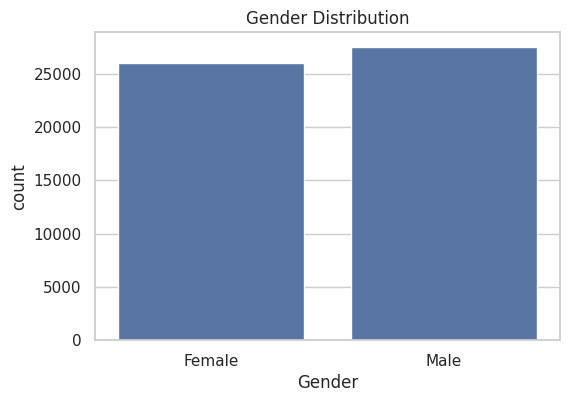

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

# Marital Status Distribution

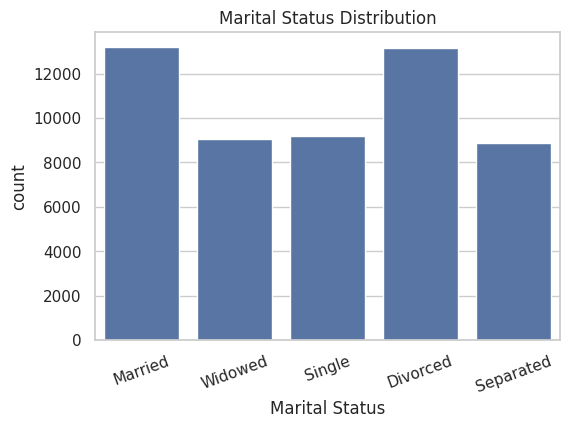

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Marital Status", data=df)
plt.title("Marital Status Distribution")
plt.xticks(rotation=20)
plt.show()

# Age Distribution

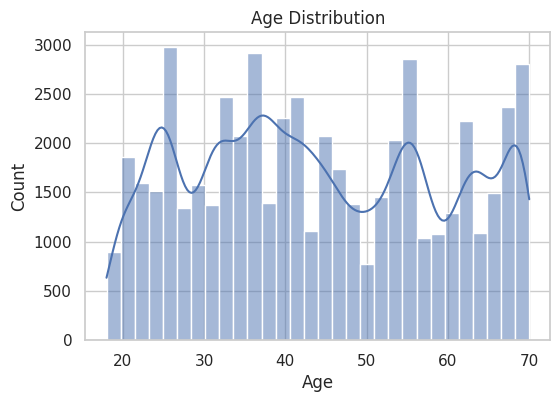

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Income Level vs Premium Amount

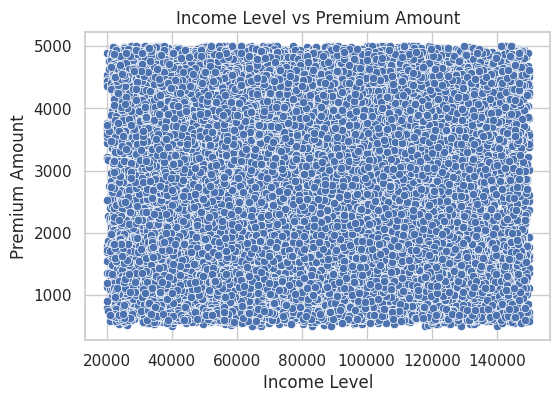

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Income Level",
    y="Premium Amount",
    data=df
)
plt.title("Income Level vs Premium Amount")
plt.show()

# Feature Selection (Numeric + Categorical)

In [ ]:
features = df[
    [
        "Age",
        "Income Level",
        "Coverage Amount",
        "Premium Amount",
        "Gender",
        "Marital Status"
    ]
]

# One-Hot Encoding (Categorical → Numeric)

In [ ]:
features_encoded = pd.get_dummies(
    features,
    columns=["Gender", "Marital Status"],
    drop_first=True
)

features_encoded.head()

,Age,Income Level,Coverage Amount,Premium Amount,Gender_Male,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,23,70541,366603,2749,False,True,False,False,False
1,26,54168,780236,1966,True,False,False,False,True
2,29,73899,773926,4413,False,False,False,True,False
3,20,63381,787815,4342,True,False,False,False,False
4,25,38794,366506,1276,False,False,True,False,False


# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_encoded)

In [ ]:
df_model = df.drop([
    'Customer ID',
    'Segmentation Group'
], axis=1)


# Elbow Method

In [ ]:
wcss = []

# Try different values of K
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

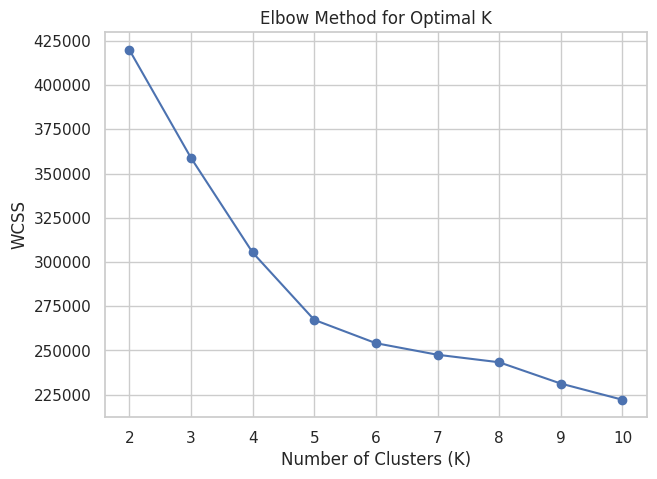

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [ ]:
df["Cluster"].value_counts()

,count
Cluster,
1,22346
2,13219
0,9077
3,8861


# Cluster Evaluation (Silhouette Score)

In [ ]:
sil_score = silhouette_score(X_scaled, df["Cluster"])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.23797080333127302


# PCA Visualization (2D)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

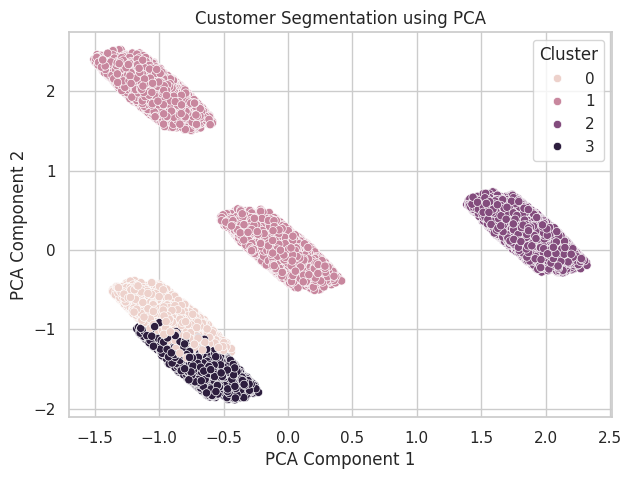

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df["Cluster"]
)
plt.title("Customer Segmentation using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# t-SNE Visualization

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


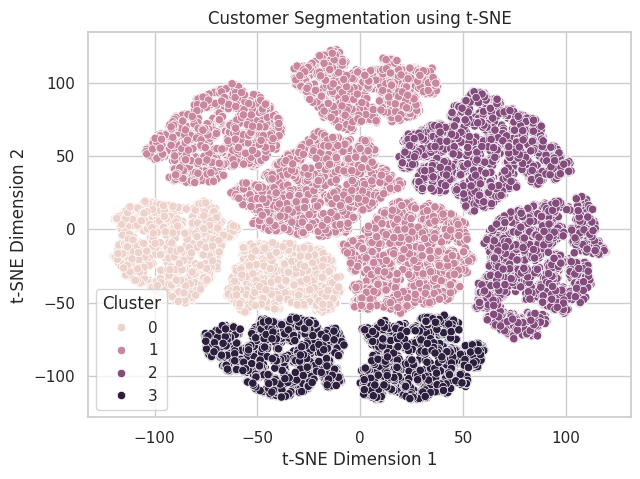

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    hue=df["Cluster"]
)
plt.title("Customer Segmentation using t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

# Cluster Profiling

In [ ]:
df.groupby("Cluster")[
    ["Age", "Income Level", "Coverage Amount", "Premium Amount"]
].mean()

,Age,Income Level,Coverage Amount,Premium Amount
Cluster,,,,
0,43.952187,82712.878594,487849.871213,3014.206786
1,44.184865,81610.351651,492235.061935,2982.839882
2,44.076254,84049.737348,500663.874272,3072.995991
3,44.320054,83833.705112,486240.408419,3062.941316


# Final Conclusion

K-Means clustering successfully segmented customers into distinct groups based on spending behavior and income levels. PCA visualization confirmed clear separation between clusters.

The segmentation provides actionable insights for designing personalized marketing strategies.

💡 Key Insights

High-income, high-spending customers represent premium segment.

Low-income, low-spending customers require promotional offers.

Medium-income but high-spending group shows potential for loyalty programs.

Cluster-based marketing can increase campaign efficiency and ROI.

Business Insight:

Data-driven segmentation enables personalized targeting instead of generic campaigns.